### Import Essential Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')
df.head(10)

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
0,1.589933e+09,1,10.0.0.1505010.0.0.3542466,10.0.0.1,5050,10.0.0.3,54246,6,-1,-1,...,20,100,0,50776,3351216,12694.000000,1.057833e-04,8.378040e+05,6.981700e-03,0
1,1.589933e+09,1,10.0.0.35424610.0.0.150506,10.0.0.3,54246,10.0.0.1,5050,6,-1,-1,...,20,100,0,209360,11834974848,52340.000000,4.307819e-04,2.958744e+09,2.435180e+01,0
2,1.589933e+09,1,10.0.0.35424610.0.0.550501,10.0.0.3,54246,10.0.0.5,5050,1,0,8,...,20,100,0,3,294,0.750000,6.198347e-09,7.350000e+01,6.074380e-07,0
3,1.589933e+09,1,10.0.0.55424610.0.0.350501,10.0.0.5,54246,10.0.0.3,5050,1,0,0,...,20,100,0,3,294,0.750000,7.228916e-09,7.350000e+01,7.084337e-07,0
4,1.589933e+09,2,10.0.0.3010.0.0.501,10.0.0.3,0,10.0.0.5,0,1,0,8,...,20,100,0,3,294,0.750000,7.092199e-09,7.350000e+01,6.950355e-07,0
5,1.589933e+09,2,10.0.0.5010.0.0.301,10.0.0.5,0,10.0.0.3,0,1,0,0,...,20,100,0,3,294,0.750000,7.194245e-09,7.350000e+01,7.050360e-07,0
6,1.589933e+09,2,10.0.0.3010.0.0.501,10.0.0.3,0,10.0.0.5,0,1,0,8,...,20,100,0,13,1274,0.928571,3.030303e-08,9.100000e+01,2.969697e-06,0
7,1.589933e+09,2,10.0.0.5010.0.0.301,10.0.0.5,0,10.0.0.3,0,1,0,0,...,20,100,0,13,1274,0.928571,3.073286e-08,9.100000e+01,3.011820e-06,0
8,1.589933e+09,1,10.0.0.1505010.0.0.3542466,10.0.0.1,5050,10.0.0.3,54246,6,-1,-1,...,20,100,0,139454,9203964,9961.000000,2.869424e-04,6.574260e+05,1.893820e-02,0
9,1.589933e+09,1,10.0.0.35424610.0.0.150506,10.0.0.3,54246,10.0.0.1,5050,6,-1,-1,...,20,100,0,596064,33916209400,42576.000000,1.211512e-03,2.422586e+09,6.893538e+01,0


### Data Preprocessing

#### Dataset Dimensions

In [3]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 2667523 rows and 22 columns


#### Concise summary of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667523 entries, 0 to 2667522
Data columns (total 22 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   timestamp                 float64
 1   datapath_id               int64  
 2   flow_id                   object 
 3   ip_src                    object 
 4   tp_src                    int64  
 5   ip_dst                    object 
 6   tp_dst                    int64  
 7   ip_proto                  int64  
 8   icmp_code                 int64  
 9   icmp_type                 int64  
 10  flow_duration_sec         int64  
 11  flow_duration_nsec        int64  
 12  idle_timeout              int64  
 13  hard_timeout              int64  
 14  flags                     int64  
 15  packet_count              int64  
 16  byte_count                int64  
 17  packet_count_per_second   float64
 18  packet_count_per_nsecond  float64
 19  byte_count_per_second     float64
 20  byte_count_per_nsecond  

#### Descriptive statistics of dataset

In [5]:
df.describe()

,timestamp,datapath_id,tp_src,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flow_duration_nsec,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
count,2.667523e+06,2.667523e+06,2.667523e+06,2.667523e+06,2.667523e+06,2.667523e+06,2.667523e+06,2.667523e+06,2.667523e+06,2667523.0,2667523.0,2667523.0,2.667523e+06,2.667523e+06,2.667523e+06,2.667523e+06,2.667523e+06,2.667523e+06,2.667523e+06
mean,1.590023e+09,2.985793e+00,2.225254e+04,6.001862e+03,6.625404e+00,-5.473254e-01,2.118896e+00,1.592080e+01,4.967868e+08,20.0,100.0,0.0,1.805451e+04,8.310616e+08,1.473977e+03,1.353151e-04,6.752863e+07,6.277890e+00,6.600393e-01
std,5.401687e+04,1.513236e+00,2.209444e+04,1.506899e+04,6.059951e+00,4.977554e-01,4.169818e+00,1.947373e+01,2.900372e+08,0.0,0.0,0.0,9.358057e+04,5.172473e+09,7.735860e+03,3.785873e-03,4.286380e+08,2.104584e+02,4.736956e-01
min,1.589933e+09,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,20.0,100.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.589963e+09,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,5.000000e+00,2.440000e+08,20.0,100.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.590011e+09,3.000000e+00,1.519800e+04,8.000000e+01,6.000000e+00,-1.000000e+00,-1.000000e+00,1.100000e+01,4.950000e+08,20.0,100.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.590072e+09,4.000000e+00,4.243300e+04,8.000000e+01,6.000000e+00,0.000000e+00,8.000000e+00,1.600000e+01,7.490000e+08,20.0,100.0,0.0,1.900000e+01,1.862000e+03,9.795918e-01,3.846154e-08,9.607843e+01,3.873054e-06,1.000000e+00
max,1.590164e+09,6.000000e+00,6.553500e+04,6.099800e+04,1.700000e+01,0.000000e+00,8.000000e+00,1.000000e+02,9.990000e+08,20.0,100.0,0.0,6.817366e+06,4.204500e+10,4.830709e+05,6.858980e-01,7.659091e+09,3.914523e+04,1.000000e+00


#### Count of null values in each feature 

In [6]:
df.isnull().sum()

timestamp                   0
datapath_id                 0
flow_id                     0
ip_src                      0
tp_src                      0
ip_dst                      0
tp_dst                      0
ip_proto                    0
icmp_code                   0
icmp_type                   0
flow_duration_sec           0
flow_duration_nsec          0
idle_timeout                0
hard_timeout                0
flags                       0
packet_count                0
byte_count                  0
packet_count_per_second     0
packet_count_per_nsecond    0
byte_count_per_second       0
byte_count_per_nsecond      0
label                       0
dtype: int64

In [7]:
(df.isnull().sum()/df.isnull().count())*100

timestamp                   0.0
datapath_id                 0.0
flow_id                     0.0
ip_src                      0.0
tp_src                      0.0
ip_dst                      0.0
tp_dst                      0.0
ip_proto                    0.0
icmp_code                   0.0
icmp_type                   0.0
flow_duration_sec           0.0
flow_duration_nsec          0.0
idle_timeout                0.0
hard_timeout                0.0
flags                       0.0
packet_count                0.0
byte_count                  0.0
packet_count_per_second     0.0
packet_count_per_nsecond    0.0
byte_count_per_second       0.0
byte_count_per_nsecond      0.0
label                       0.0
dtype: float64

#### Drop rows with null values

In [8]:
df.dropna(inplace=True)

#### Info after handling Null Values

In [9]:
print(df.isnull().sum())
print("This Dataframe has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

timestamp                   0
datapath_id                 0
flow_id                     0
ip_src                      0
tp_src                      0
ip_dst                      0
tp_dst                      0
ip_proto                    0
icmp_code                   0
icmp_type                   0
flow_duration_sec           0
flow_duration_nsec          0
idle_timeout                0
hard_timeout                0
flags                       0
packet_count                0
byte_count                  0
packet_count_per_second     0
packet_count_per_nsecond    0
byte_count_per_second       0
byte_count_per_nsecond      0
label                       0
dtype: int64
This Dataframe has 2667523 rows and 22 columns after removing null values


#### Distribution of Target Class

In [10]:
malign = df[df['label'] == 1]
benign = df[df['label'] == 0]

print('Number of DDOS attacks that has occured :',round((len(malign)/df.shape[0])*100,2),'%')
print('Number of DDOS attacks that has not occured :',round((len(benign)/df.shape[0])*100,2),'%')

Number of DDOS attacks that has occured : 66.0 %
Number of DDOS attacks that has not occured : 34.0 %


#### Barplot of Target Class

Text(0, 0.5, 'Frequency %')

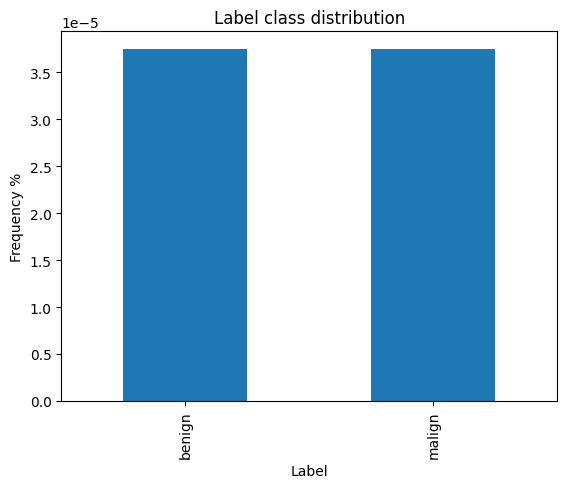

In [11]:
# Let's plot the Label class against the Frequency
labels = ['benign','malign']
classes = pd.Series(labels).value_counts() / df['label'].count() *100
#classes = pd.value_counts(df['label'], sort = True) / df['label'].count() *100
classes.plot(kind = 'bar')
plt.title("Label class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency %")

#### Columns in the dataset

In [12]:
df.columns

Index(['timestamp', 'datapath_id', 'flow_id', 'ip_src', 'tp_src', 'ip_dst',
       'tp_dst', 'ip_proto', 'icmp_code', 'icmp_type', 'flow_duration_sec',
       'flow_duration_nsec', 'idle_timeout', 'hard_timeout', 'flags',
       'packet_count', 'byte_count', 'packet_count_per_second',
       'packet_count_per_nsecond', 'byte_count_per_second',
       'byte_count_per_nsecond', 'label'],
      dtype='object')

#### Unique values in each column

In [13]:
print(df.apply(lambda col: col.unique()))

timestamp                   [1589932746.261578, 1589932746.262135, 1589932...
datapath_id                                                [1, 2, 4, 3, 5, 6]
flow_id                     [10.0.0.1505010.0.0.3542466, 10.0.0.35424610.0...
ip_src                      [10.0.0.1, 10.0.0.3, 10.0.0.5, 10.0.0.10, 10.0...
tp_src                      [5050, 54246, 0, 40223, 43804, 80, 5051, 45742...
ip_dst                      [10.0.0.3, 10.0.0.1, 10.0.0.5, 10.0.0.10, 10.0...
tp_dst                      [54246, 5050, 0, 5051, 43804, 45742, 45740, 40...
ip_proto                                                           [6, 1, 17]
icmp_code                                                             [-1, 0]
icmp_type                                                          [-1, 8, 0]
flow_duration_sec           [4, 14, 24, 34, 3, 44, 13, 54, 23, 64, 33, 74,...
flow_duration_nsec          [480000000, 486000000, 484000000, 415000000, 4...
idle_timeout                                                    

#### Numerical Features

In [14]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 19 and they are : 
 ['timestamp', 'datapath_id', 'tp_src', 'tp_dst', 'ip_proto', 'icmp_code', 'icmp_type', 'flow_duration_sec', 'flow_duration_nsec', 'idle_timeout', 'hard_timeout', 'flags', 'packet_count', 'byte_count', 'packet_count_per_second', 'packet_count_per_nsecond', 'byte_count_per_second', 'byte_count_per_nsecond', 'label']


#### Categorical Features

In [15]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 3 and they are : 
 ['flow_id', 'ip_src', 'ip_dst']


#### Number of Unique values in the numerical features 

In [16]:
# number of unique values in each numerical variable
df[numerical_features].nunique(axis=0)

timestamp                   117148
datapath_id                      6
tp_src                       61069
tp_dst                       14662
ip_proto                         3
icmp_code                        2
icmp_type                        3
flow_duration_sec              101
flow_duration_nsec            1000
idle_timeout                     1
hard_timeout                     1
flags                            1
packet_count                 46872
byte_count                   66495
packet_count_per_second      91090
packet_count_per_nsecond    290464
byte_count_per_second       108285
byte_count_per_nsecond      310368
label                            2
dtype: int64

#### Discrete numerical features

In [17]:
#discrete numerical features 
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 7 and they are : 
 ['datapath_id', 'ip_proto', 'icmp_code', 'icmp_type', 'idle_timeout', 'hard_timeout', 'flags']


In [18]:
df[discrete_feature].head(10)

,datapath_id,ip_proto,icmp_code,icmp_type,idle_timeout,hard_timeout,flags
0,1,6,-1,-1,20,100,0
1,1,6,-1,-1,20,100,0
2,1,1,0,8,20,100,0
3,1,1,0,0,20,100,0
4,2,1,0,8,20,100,0
5,2,1,0,0,20,100,0
6,2,1,0,8,20,100,0
7,2,1,0,0,20,100,0
8,1,6,-1,-1,20,100,0
9,1,6,-1,-1,20,100,0


#### Continuous features

In [19]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 11 and they are : 
 ['timestamp', 'tp_src', 'tp_dst', 'flow_duration_sec', 'flow_duration_nsec', 'packet_count', 'byte_count', 'packet_count_per_second', 'packet_count_per_nsecond', 'byte_count_per_second', 'byte_count_per_nsecond']


### Encoding categorical features

In [20]:
for col in categorical_features:
    freq = df[col].value_counts() / len(df)
    df[col + '_freq_encode'] = df[col].map(freq)
    df.drop(columns=[col], inplace=True)

print("This DataFrame has {} rows and {} columns after encoding".format(df.shape[0], df.shape[1]))


This DataFrame has 2667523 rows and 22 columns after encoding


In [21]:
#dataframe after encoding
df.head(10)

,timestamp,datapath_id,tp_src,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flow_duration_nsec,idle_timeout,...,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label,flow_id_freq_encode,ip_src_freq_encode,ip_dst_freq_encode
0,1.589933e+09,1,5050,54246,6,-1,-1,4,480000000,20,...,50776,3351216,12694.000000,1.057833e-04,8.378040e+05,6.981700e-03,0,1.124639e-06,0.097633,0.106865
1,1.589933e+09,1,54246,5050,6,-1,-1,4,486000000,20,...,209360,11834974848,52340.000000,4.307819e-04,2.958744e+09,2.435180e+01,0,1.124639e-06,0.011276,0.430829
2,1.589933e+09,1,54246,5050,1,0,8,4,484000000,20,...,3,294,0.750000,6.198347e-09,7.350000e+01,6.074380e-07,0,3.748796e-07,0.011276,0.011881
3,1.589933e+09,1,54246,5050,1,0,0,4,415000000,20,...,3,294,0.750000,7.228916e-09,7.350000e+01,7.084337e-07,0,3.748796e-07,0.012208,0.106865
4,1.589933e+09,2,0,0,1,0,8,4,423000000,20,...,3,294,0.750000,7.092199e-09,7.350000e+01,6.950355e-07,0,7.422616e-05,0.011276,0.011881
5,1.589933e+09,2,0,0,1,0,0,4,417000000,20,...,3,294,0.750000,7.194245e-09,7.350000e+01,7.050360e-07,0,7.422616e-05,0.012208,0.106865
6,1.589933e+09,2,0,0,1,0,8,14,429000000,20,...,13,1274,0.928571,3.030303e-08,9.100000e+01,2.969697e-06,0,7.422616e-05,0.011276,0.011881
7,1.589933e+09,2,0,0,1,0,0,14,423000000,20,...,13,1274,0.928571,3.073286e-08,9.100000e+01,3.011820e-06,0,7.422616e-05,0.012208,0.106865
8,1.589933e+09,1,5050,54246,6,-1,-1,14,486000000,20,...,139454,9203964,9961.000000,2.869424e-04,6.574260e+05,1.893820e-02,0,1.124639e-06,0.097633,0.106865
9,1.589933e+09,1,54246,5050,6,-1,-1,14,492000000,20,...,596064,33916209400,42576.000000,1.211512e-03,2.422586e+09,6.893538e+01,0,1.124639e-06,0.011276,0.430829


In [22]:
df.dtypes

timestamp                   float64
datapath_id                   int64
tp_src                        int64
tp_dst                        int64
ip_proto                      int64
icmp_code                     int64
icmp_type                     int64
flow_duration_sec             int64
flow_duration_nsec            int64
idle_timeout                  int64
hard_timeout                  int64
flags                         int64
packet_count                  int64
byte_count                    int64
packet_count_per_second     float64
packet_count_per_nsecond    float64
byte_count_per_second       float64
byte_count_per_nsecond      float64
label                         int64
flow_id_freq_encode         float64
ip_src_freq_encode          float64
ip_dst_freq_encode          float64
dtype: object

### Split into Independent and dependent variables

In [23]:
#separating input and output attributes
x = df.drop(['label'], axis=1)
y = df['label']

### Normalizing features

In [24]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

### Train-Test-Split [70-30]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(X_train.shape, X_test.shape)

(1867266, 21) (800257, 21)


## BASELINE CLASSIFIERS
1. RF
2. KNN
3. SVM
4. Decision tree
5. Naive Bayes
6. Logistic Regression


In [26]:
Classifier_accuracy = []

## Model Evaluation 

#### Random Forest Classifier

In [27]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of RF Classifier : %.2f" % (accuracy*100))

Accuracy of RF Classifier : 100.00


#### K-Nearest Neighbor Classifier

In [28]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of KNN Classifier : %.2f" % (accuracy*100))

Accuracy of KNN Classifier : 100.00


#### SVM Classifier

In [29]:
svc_clf = SVC() 
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SVM Classifier : %.2f" % (accuracy*100))

Accuracy of SVM Classifier : 100.00


#### Decision Tree Classifier

In [30]:
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Decision Tree Classifier : %.2f" % (accuracy*100) )

Accuracy of Decision Tree Classifier : 100.00


#### Naive Bayes Classifier

In [31]:
nb_clf = CategoricalNB()
nb_clf.fit(X_train,y_train)
y_pred = nb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Naive Bayes Classifier : %.2f" % (accuracy*100) )

Accuracy of Naive Bayes Classifier : 65.00


#### Logistic Regression 

In [32]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
y_pred=lr_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Logistic Regression Classifier : %.2f" % (accuracy*100))

Accuracy of Logistic Regression Classifier : 100.00


### Comparitive analysis of models

In [33]:
Classifier_names = ["RF", "KNN", "SVM", "Decision Tree","Naive Bayes","Logistic Regression"]

In [34]:
df_clf = pd.DataFrame()
df_clf['name'] = Classifier_names
df_clf['Accuracy'] = Classifier_accuracy
df_clf = df_clf.sort_values(by=['Accuracy'], ascending=False)
df_clf.head(10)

,name,Accuracy
3,Decision Tree,100.000000
0,RF,99.999875
2,SVM,99.999500
1,KNN,99.999125
5,Logistic Regression,99.995127
4,Naive Bayes,64.995745


#### Visualize accuracies of the models

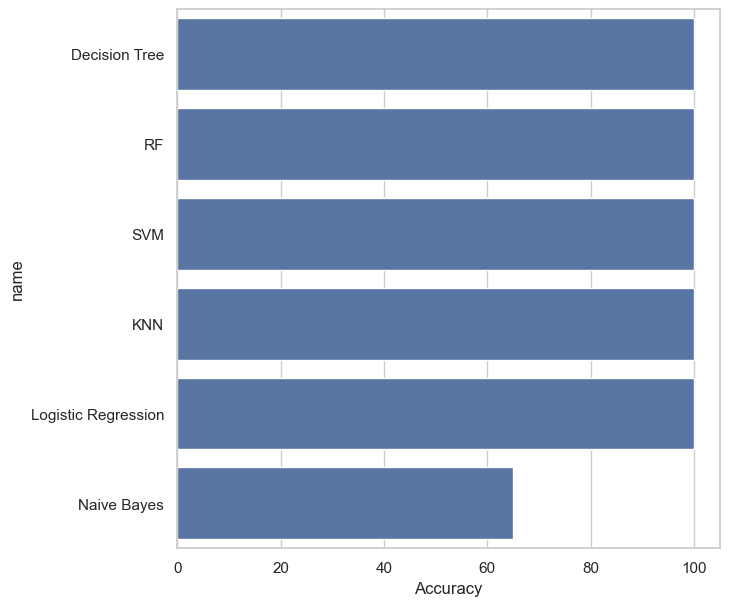

In [35]:
sns.set(style="whitegrid",rc={'figure.figsize':(7,7)})
ax = sns.barplot(y="name", x="Accuracy", data=df_clf)

In [36]:
print(f"The best baseline Classifier is {df_clf.name[0]} with an accuracy of {df_clf.Accuracy[0]}.")

The best baseline Classifier is RF with an accuracy of 99.99987504014335.


## Making Sample Predictions 

In [37]:
classes = rf_clf.predict(X_test)
print(classes)

[1 1 1 ... 0 0 1]


In [38]:
y_pred = []
for i in classes:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [39]:
y_pred[:20]

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]

In [40]:
y_test[:20]

1216991    1
300108     1
505155     1
2003983    1
1824585    0
1940864    1
474207     1
2207685    1
323219     1
2072537    1
1283233    1
160174     1
1455485    1
373574     1
193084     1
2653596    0
1158055    1
607759     1
2105324    1
869902     1
Name: label, dtype: int64

## Classification Report 

In [41]:
print(classification_report(y_test, y_pred, target_names = labels))

              precision    recall  f1-score   support

      benign       1.00      1.00      1.00    271755
      malign       1.00      1.00      1.00    528502

    accuracy                           1.00    800257
   macro avg       1.00      1.00      1.00    800257
weighted avg       1.00      1.00      1.00    800257



## Plotting Confusion Matrix

In [42]:
from itertools import product
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm1 = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] 
        thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm1[i, j])+ " ("+ str(cm[i, j]*100)+"%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

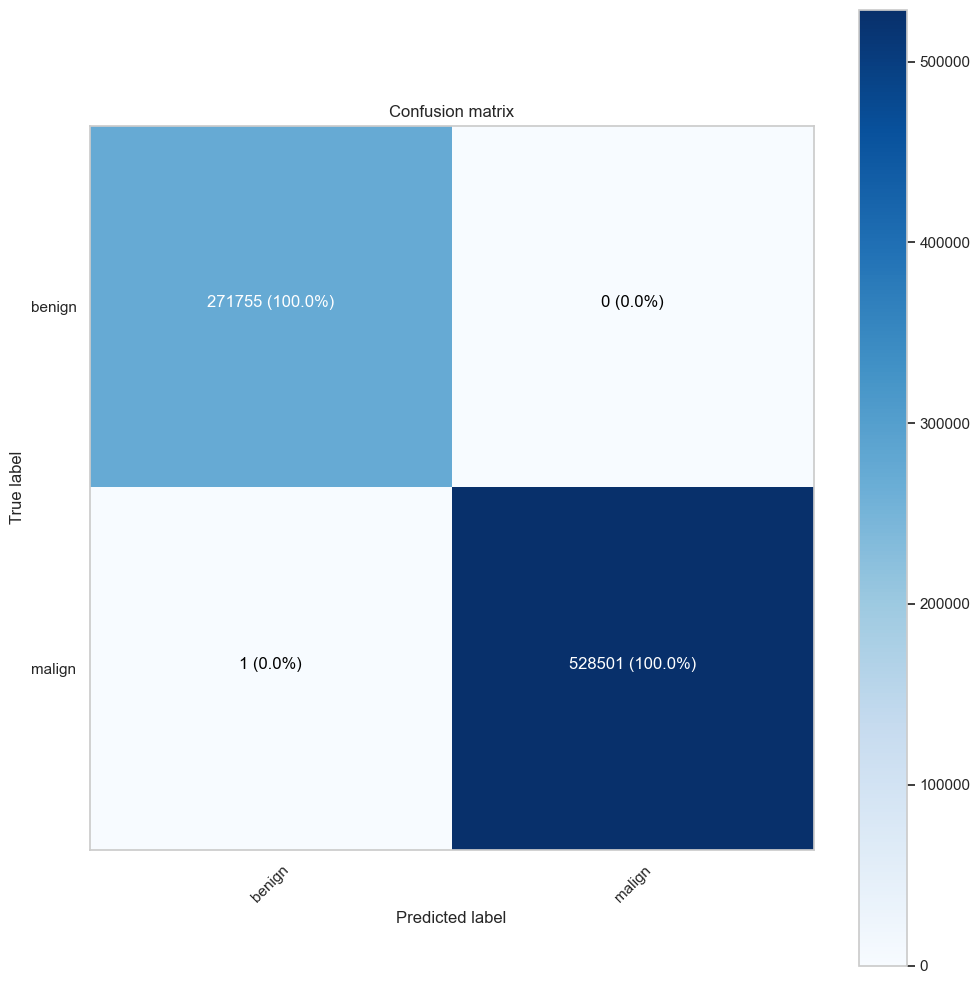

In [43]:
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = labels)